<a href="https://colab.research.google.com/github/snghx/ITB/blob/main/ITB_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IT와 비즈니스 혁신(002) 7조 소스파일

----
노승혜  
이슬비  
정종윤  
최경인

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

### 💻 데이터 전처리

In [ ]:
# 데이터 불러오기

train_path = 'https://raw.githubusercontent.com/snghx/ITB/main/data/train.csv'
train = pd.read_csv(train_path, index_col = 'ID')

test_path = 'https://raw.githubusercontent.com/snghx/ITB/main/data/test.csv'
test = pd.read_csv(test_path, index_col = 'ID')

In [ ]:
# 결측치 확인

pd.isna(train).sum()

Age              0
Height           0
Weight           0
Position         0
PreferredFoot    0
                ..
LBRating         0
CBRating         0
RBRating         0
GKRating         0
Prospect         0
Length: 65, dtype: int64

데이터 인코딩

네 개의 열(Positioning / PreferredFoot / AttackingWorkRate / DefensiveWorkRate)

속 문자열을 엑셀 필터를 이용해 수치형으로 변환

-> 데이터 값 0~1로 정규화

In [ ]:
# 데이터 스케일 조정

!pip install -U pandas-profiling

In [ ]:
# train data

df = pd.read_csv("/content/train_1.csv",index_col='ID')

scaler = MinMaxScaler()

# fit -> transform
scaler.fit(df) # df는 2차원 이상의 값이어야 함
df_scaled = scaler.transform(df)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_scaled = pd.DataFrame(data = df_scaled)

# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(df_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(df.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(df.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(df_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(df_scaled.max(axis=0)))

# 테스트 데이터 변환
X_test_scaled = scaler.transform(df)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(df_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(df_scaled.max(axis=0)))

변환된 후 크기: (3019, 65)
스케일 조정 전 특성별 최소값:
 Age               16.00
Height           160.00
Weight            49.00
Position           0.00
PreferredFoot      0.00
                  ...  
LBRating           0.00
CBRating           0.00
RBRating           0.00
GKRating           0.25
Prospect           0.00
Length: 65, dtype: float64
스케일 조정 전 특성별 최대값:
 Age               21.0000
Height           204.0000
Weight            99.0000
Position          14.0000
PreferredFoot      1.0000
                   ...   
LBRating           9.1429
CBRating           9.0278
RBRating           9.1429
GKRating           8.6250
Prospect           1.0000
Length: 65, dtype: float64
스케일 조정 후 특성별 최소값:
 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
Length: 65, dtype: float64
스케일 조정 후 특성별 최대값:
 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
60    1.0
61    1.0
62    1.0
63    1.0
64    1.0
Length: 65, dtype: float64
스케일 조정 후 특성별 최소값:
0     0

In [ ]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,1.0,0.500000,0.66,0.071429,1.0,0.5,0.5,0.435491,0.169020,0.392858,0.419357,0.727275,0.666663,0.567576,0.24176,0.783782,0.527776,0.188238,0.517242,0.285711,0.195125,0.563378,0.592588,0.493831,0.625004,0.493332,0.499994,0.527025,0.472969,0.677420,0.662502,0.666667,0.216872,0.636365,0.696208,0.523254,0.369864,0.520004,0.565215,0.746834,0.763156,0.710531,0.067570,0.054801,0.000000,0.054050,0.066669,0.450709,0.485717,0.485297,0.485297,0.485297,0.485717,0.492534,0.529415,0.529409,0.529415,0.687501,0.656247,0.687501,0.703125,0.723078,0.703125,0.074627,0.0
1,1.0,0.000000,0.52,1.000000,0.0,1.0,0.5,0.741940,0.732394,0.517856,0.629036,0.303033,0.666663,0.527036,0.76923,0.729733,0.555558,0.670587,0.758621,0.666667,0.560975,0.464791,0.604938,0.864197,0.737498,0.693334,0.706891,0.878379,0.689189,0.677420,0.737498,0.727275,0.795182,0.415585,0.392405,0.767447,0.671239,0.986676,0.666667,0.303794,0.368419,0.302633,0.108109,0.095895,0.043469,0.040543,0.119997,0.718312,0.728571,0.750003,0.750003,0.750003,0.728571,0.731345,0.705883,0.632350,0.705883,0.578128,0.484376,0.578128,0.546872,0.461541,0.546872,0.119403,0.0
2,0.4,0.113636,0.22,0.714286,1.0,0.5,0.5,0.612910,0.295779,0.482144,0.419357,0.560604,0.473679,0.689194,0.40659,0.608115,0.569449,0.223529,0.540232,0.345234,0.475607,0.577469,0.580249,0.691362,0.700003,0.613331,0.206897,0.608106,0.297295,0.596779,0.662502,0.424245,0.445787,0.441560,0.518993,0.604652,0.410966,0.466672,0.376806,0.556960,0.671051,0.631582,0.054060,0.068495,0.130434,0.081074,0.079998,0.464785,0.557147,0.514703,0.514703,0.514703,0.557147,0.537309,0.573532,0.529409,0.573532,0.640619,0.562502,0.640619,0.640617,0.553845,0.640617,0.059701,0.0
3,0.8,0.681818,0.46,0.071429,1.0,0.5,0.5,0.451616,0.056336,0.053574,0.032255,0.530308,0.438599,0.216218,0.16484,0.513515,0.236112,0.270591,0.195400,0.273811,0.243900,0.169017,0.271605,0.567907,0.587499,0.320001,0.293098,0.432434,0.216211,0.580648,0.550003,0.439392,0.240970,0.441560,0.594941,0.232553,0.178091,0.373333,0.318838,0.582274,0.565793,0.552633,0.108109,0.054801,0.072457,0.067568,0.119997,0.239441,0.242853,0.235289,0.235289,0.235289,0.242853,0.223879,0.250000,0.250003,0.250000,0.453123,0.406250,0.453123,0.499995,0.507687,0.499995,0.074627,0.0
4,1.0,0.477273,0.56,1.000000,1.0,1.0,0.5,0.838718,0.732394,0.660717,0.741939,0.151517,0.631572,0.797303,0.79121,0.729733,0.694445,0.741180,0.793105,0.500000,0.731712,0.535209,0.790124,0.938272,0.812497,0.840004,0.724138,0.662167,0.689189,0.225807,0.712499,0.651509,0.795182,0.597408,0.164550,0.860464,0.657534,0.786673,0.695644,0.278480,0.171057,0.092102,0.081079,0.041095,0.115940,0.121617,0.013329,0.788731,0.828576,0.838242,0.838242,0.838242,0.828576,0.820897,0.823532,0.676472,0.823532,0.578128,0.468746,0.578128,0.515624,0.369226,0.515624,0.104478,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0.6,0.409091,0.32,0.000000,1.0,0.5,0.5,0.580647,0.267606,0.464282,0.451612,0.439396,0.333337,0.472976,0.30769,0.500006,0.611110,0.399996,0.563221,0.357144,0.329269,0.577469,0.617288,0.629634,0.725003,0.533329,0.310345,0.675677,0.391884,0.451614,0.474996,0.272725,0.445787,0.545459,0.493673,0.581392,0.506852,0.466672,0.376806,0.468354,0.539476,0.486847,0.000000,0.013694,0.057963,0.027025,0.093339,0.450709,0.542859,0.529411,0.529411,0.529411,0.542859,0.567164,0.558819,0.544117,0.558819,0.562497,0.515624,0.562497,0.546872,0.476927,0.546872,0.029851,1.0
3015,0.6,0.272727,0.22,0.000000,1.0,1.0,0.0,0.709677,0.746481,0.910714,0.822587,0.348483,0.263155,0.945951,0.83516,0.540545,0.875004,0.752940,0.873568,0.797612,0.670731,0.845074,0.888893,0.790122,0.775002,

In [ ]:
print(f"최소\n{df_scaled.min()}")
print(f"최대\n{df_scaled.max()}")

최소
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
Length: 65, dtype: float64
최대
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
60    1.0
61    1.0
62    1.0
63    1.0
64    1.0
Length: 65, dtype: float64


In [ ]:
# test data

df = pd.read_csv("/content/test_1.csv",index_col='ID')

scaler = MinMaxScaler()

# fit -> transform
scaler.fit(df) # df는 2차원 이상의 값이어야 함
df_scaled = scaler.transform(df)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_scaled = pd.DataFrame(data = df_scaled)

# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(df_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(df.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(df.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(df_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(df_scaled.max(axis=0)))

# 테스트 데이터 변환
X_test_scaled = scaler.transform(df)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(df_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(df_scaled.max(axis=0)))

변환된 후 크기: (1626, 64)
스케일 조정 전 특성별 최소값:
 Age               16.0000
Height           155.0000
Weight            54.0000
Position           0.0000
PreferredFoot      0.0000
                   ...   
RWBRating          0.0000
LBRating           0.0000
CBRating           0.1389
RBRating           0.0000
GKRating           0.2500
Length: 64, dtype: float64
스케일 조정 전 특성별 최대값:
 Age               21.0000
Height           202.0000
Weight            97.0000
Position          14.0000
PreferredFoot      1.0000
                   ...   
RWBRating          9.4366
LBRating           9.5714
CBRating           8.8889
RBRating           9.5714
GKRating           8.2500
Length: 64, dtype: float64
스케일 조정 후 특성별 최소값:
 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
Length: 64, dtype: float64
스케일 조정 후 특성별 최대값:
 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
59    1.0
60    1.0
61    1.0
62    1.0
63    1.0
Length: 64, dtype: float64
스케일

In [ ]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.2,0.617021,0.488372,0.357143,1.0,0.5,0.5,0.285711,0.660713,0.589280,0.490904,0.092311,0.326924,0.064937,0.041099,0.093339,0.078949,0.027779,0.060978,0.065799,0.094596,0.253526,0.051944,0.123455,0.000000,0.094590,0.075471,0.38667,0.369233,0.605634,0.259738,0.222228,0.027029,0.116881,0.113932,0.025309,0.158733,0.142859,0.193550,0.040002,0.077927,0.084509,0.699997,0.753625,0.768108,0.600005,0.742853,0.000000,0.014708,0.015154,0.015154,0.015154,0.014708,0.015159,0.014921,0.059696,0.014921,0.029852,0.046157,0.029852,0.029849,0.015874,0.029849,0.656250
1,0.6,0.702128,0.604651,1.000000,1.0,1.0,0.5,0.428566,0.589287,0.196423,0.345453,0.169235,0.615384,0.272720,0.739728,0.733336,0.421051,0.569437,0.487804,0.381584,0.310813,0.183096,0.545453,0.555559,0.620255,0.540537,0.320759,0.46667,0.523069,0.676054,0.480523,0.634916,0.527029,0.623383,0.177214,0.632910,0.380960,0.700006,0.467744,0.240002,0.233769,0.154926,0.042856,0.057978,0.043469,0.085708,0.085711,0.606556,0.514708,0.545450,0.545450,0.545450,0.514708,0.484852,0.462685,0.373138,0.462685,0.328360,0.292310,0.328360,0.313434,0.333337,0.313434,0.062500
2,0.2,0.382979,0.325581,0.000000,1.0,1.0,1.0,0.678569,0.785720,0.928576,0.963628,0.769228,0.711541,0.792206,0.876714,0.493330,0.960531,0.638891,0.951229,0.881578,0.540542,0.957740,0.961037,0.765437,0.759500,0.905410,0.905655,0.93333,0.553843,0.676054,0.831172,0.428578,0.837840,0.935069,0.886079,0.949371,0.952387,0.628577,0.887094,0.719995,0.844157,0.816904,0.042856,0.072466,0.086951,0.028569,0.114286,0.852457,0.941178,0.939396,0.939396,0.939396,0.941178,0.954545,0.925371,0.940293,0.925371,0.880603,0.892308,0.880603,0.850753,0.793646,0.850753,0.109375
3,0.8,0.489362,0.348837,0.000000,1.0,0.5,0.5,0.660715,0.803580,0.660717,0.781818,0.292309,0.634610,0.610389,0.904101,0.586669,0.723686,0.777776,0.841468,0.460524,0.729723,0.690135,0.831166,0.777774,0.721520,0.797295,0.754712,0.72000,0.584618,0.549301,0.688316,0.571433,0.716217,0.610390,0.455694,0.822791,0.793653,0.914282,0.790318,0.253340,0.350654,0.422531,0.085711,0.057978,0.101445,0.142859,0.128567,0.803272,0.823524,0.818187,0.818187,0.818187,0.823524,0.818182,0.791045,0.731339,0.791045,0.597016,0.553852,0.597016,0.552239,0.460320,0.552239,0.140625
4,0.6,0.446809,0.418605,0.000000,0.0,1.0,0.0,0.499994,0.571427,0.553568,0.727266,0.369233,0.403843,0.519474,0.630130,0.480000,0.644737,0.583332,0.817076,0.657898,0.608102,0.718305,0.792203,0.654319,0.620255,0.689189,0.452827,0.69333,0.661542,0.521129,0.493504,0.349205,0.567566,0.506491,0.341773,0.518991,0.539680,0.657141,0.677412,0.533333,0.363636,0.507039,0.057149,0.115943,0.086951,0.000000,0.028575,0.622951,0.676465,0.666671,0.666671,0.666671,0.676465,0.666670,0.656708,0.597019,0.656708,0.537312,0.507695,0.537312,0.507460,0.444446,0.507460,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,0.6,0.489362,0.232558,0.000000,1.0,0.5,0.5,0.357138,0.553580,0.607142,0.581815,0.338458,0.249994,0.649349,0.671229,0.453331,0.723686,0.555553,0.719511,0.539476,0.567566,0.690135,0.701296,0.543211,0.544306,0.581084,0.283023,0.70667,0.538456,0.478871,0.337657,0.253975,0.540537,0.376628,0.316454,0.658230,0.555560,0.600000,0.516125,0.426664,0.402605,0.521130,0.071430,0.115943,0.028988,0.114290,0.028575,0.590161,0.647059,0.636363,0.636363,0.636363,0.647059,0.636364,0.626865,0.582092,0.626865,0.507460,0.461538,0.507460,0.477610,0.396823,0.477610,0.062500
1622,0.8,0.510638,0.441860,0.142857,1.0,0.5,0.5,0.482140,0.214293,0.428570,0.381813,0.615392,0.519227,0.376617,0.301371,0.613338,0.618428,0.347225,0.500000,0.315796,0.337837,0.619717,0.584417,0.604939,0.632918,0.

In [ ]:
print(f"최소\n{df_scaled.min()}")
print(f"최대\n{df_scaled.max()}")

최소
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
Length: 64, dtype: float64
최대
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
59    1.0
60    1.0
61    1.0
62    1.0
63    1.0
Length: 64, dtype: float64


### 🔍 모델 선정 및 배경

#### pycaret 라이브러리

In [ ]:
# pycaret 라이브러리 설치
!pip install --pre pycaret
!pip install catboost

In [ ]:
from pycaret.classification import *

In [ ]:
train1 = pd.read_csv("/content/train1_x.csv")

In [ ]:
clf = setup(data=train1, 
            target='Prospect',
            normalize=True,                            
            normalize_method='zscore',                              
            iterative_imputation_iters=10,           
            categorical_iterative_imputer='lightgbm',
            polynomial_features=True,
            session_id=123,
            ) 

,Description,Value
0,Session id,123
1,Target,Prospect
2,Target type,Binary
3,Original data shape,"(3019, 65)"
4,Transformed data shape,"(3019, 2145)"
5,Transformed train set shape,"(2113, 2145)"
6,Transformed test set shape,"(906, 2145)"
7,Numeric features,64
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:13:35
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7861,0.8400,0.6318,0.7395,0.6805,0.5213,0.5257,70.2520
rf,Random Forest Classifier,0.7814,0.8324,0.6121,0.7383,0.6686,0.5077,0.5132,4.2010
et,Extra Trees Classifier,0.7771,0.8355,0.5911,0.7406,0.6570,0.4950,0.5023,1.5980
lightgbm,Light Gradient Boosting Machine,0.7757,0.8379,0.6225,0.7193,0.6668,0.4992,0.5026,25.2480
ada,Ada Boost Classifier,0.7619,0.8071,0.6461,0.6807,0.6621,0.4787,0.4798,13.7040
lr,Logistic Regression,0.7435,0.7951,0.6227,0.6523,0.6360,0.4385,0.4396,8.2250
ridge,Ridge Classifier,0.7170,0.0000,0.5925,0.6121,0.6012,0.3823,0.3831,0.4690
svm,SVM - Linear Kernel,0.7155,0.0000,0.6173,0.6090,0.6098,0.3868,0.3895,0.8070
knn,K Neighbors Classifier,0.6952,0.7173,0.4874,0.5957,0.5346,0.3119,0.3161,0.4860
dt,Decision Tree Classifier,0.6943,0.6707,0.5858,0.5771,0.5806,0.3403,0.3409,3.2700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7861,0.8400,0.6318,0.7395,0.6805,0.5213,0.5257,70.2520
rf,Random Forest Classifier,0.7814,0.8324,0.6121,0.7383,0.6686,0.5077,0.5132,4.2010
catboost,CatBoost Classifier,0.7804,0.8382,0.6292,0.7270,0.6737,0.5097,0.5133,503.3510
et,Extra Trees Classifier,0.7771,0.8355,0.5911,0.7406,0.6570,0.4950,0.5023,1.5980
lightgbm,Light Gradient Boosting Machine,0.7757,0.8379,0.6225,0.7193,0.6668,0.4992,0.5026,25.2480
ada,Ada Boost Classifier,0.7619,0.8071,0.6461,0.6807,0.6621,0.4787,0.4798,13.7040
lr,Logistic Regression,0.7435,0.7951,0.6227,0.6523,0.6360,0.4385,0.4396,8.2250
ridge,Ridge Classifier,0.7170,0.0000,0.5925,0.6121,0.6012,0.3823,0.3831,0.4690
svm,SVM - Linear Kernel,0.7155,0.0000,0.6173,0.6090,0.6098,0.3868,0.3895,0.8070
knn,K Neighbors Classifier,0.6952,0.7173,0.4874,0.5957,0.5346,0.3119,0.3161,0.4860


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##### CatBoost

In [ ]:
from catboost import CatBoostClassifier,CatBoostRegressor, Pool, metrics, cv

In [ ]:
X = train[['Age', 'Height', 'Weight', 'Position', 'PreferredFoot',
       'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating',
       'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating']]
y = train.Prospect
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  train_size=0.75, random_state=42)

In [ ]:
model = CatBoostClassifier()

In [ ]:
model.fit(X_train, y_train)

Learning rate set to 0.014604
0:	learn: 0.6863609	total: 59.5ms	remaining: 59.5s
1:	learn: 0.6783360	total: 85.2ms	remaining: 42.5s
2:	learn: 0.6715475	total: 96.2ms	remaining: 32s
3:	learn: 0.6649292	total: 108ms	remaining: 27s
4:	learn: 0.6584886	total: 123ms	remaining: 24.4s
5:	learn: 0.6516088	total: 130ms	remaining: 21.6s
6:	learn: 0.6458457	total: 139ms	remaining: 19.7s
7:	learn: 0.6395770	total: 146ms	remaining: 18.2s
8:	learn: 0.6348760	total: 161ms	remaining: 17.8s
9:	learn: 0.6294259	total: 176ms	remaining: 17.4s
10:	learn: 0.6252627	total: 199ms	remaining: 17.9s
11:	learn: 0.6201459	total: 213ms	remaining: 17.5s
12:	learn: 0.6150522	total: 230ms	remaining: 17.5s
13:	learn: 0.6118220	total: 244ms	remaining: 17.2s
14:	learn: 0.6068138	total: 282ms	remaining: 18.5s
15:	learn: 0.6030030	total: 296ms	remaining: 18.2s
16:	learn: 0.5990940	total: 305ms	remaining: 17.6s
17:	learn: 0.5940841	total: 324ms	remaining: 17.7s
18:	learn: 0.5892910	total: 330ms	remaining: 17s
19:	learn: 0.5

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(model.score(X_test, y_test))

0.776158940397351


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}
 
init_cbc = CatBoostClassifier(random_state=0)
grid_cbc = GridSearchCV(init_cbc, param_grid=parameters, cv=3, refit=True) #cv: cross validation
print(grid_cbc)

grid_cbc.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_cbc.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_cbc.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_cbc.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2:	learn: 0.6705009	total: 7.86ms	remaining: 2.61s
3:	learn: 0.6637605	total: 10.3ms	remaining: 2.56s
4:	learn: 0.6547173	total: 17.7ms	remaining: 3.53s
5:	learn: 0.6485922	total: 19.7ms	remaining: 3.27s
6:	learn: 0.6415712	total: 22.4ms	remaining: 3.18s
7:	learn: 0.6364415	total: 24.6ms	remaining: 3.06s
8:	learn: 0.6299571	total: 26.8ms	remaining: 2.95s
9:	learn: 0.6245100	total: 29.3ms	remaining: 2.9s
10:	learn: 0.6199935	total: 30.9ms	remaining: 2.78s
11:	learn: 0.6151099	total: 34.6ms	remaining: 2.85s
12:	learn: 0.6105406	total: 36.7ms	remaining: 2.78s
13:	learn: 0.6066047	total: 46ms	remaining: 3.24s
14:	learn: 0.6021546	total: 50.2ms	remaining: 3.3s
15:	learn: 0.5974775	total: 54.5ms	remaining: 3.35s
16:	learn: 0.5928694	total: 56.5ms	remaining: 3.27s
17:	learn: 0.5885957	total: 58.2ms	remaining: 3.17s
18:	learn: 0.5828393	total: 59.8ms	remaining: 3.09s
19:	learn: 0.5786329	total: 61.5ms	remaining: 3.01s
20:	learn: 0.5749109	total: 63.1ms	remai

In [ ]:
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_cbc.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.781


In [ ]:
from sklearn.metrics import confusion_matrix 
print(y_test.value_counts())

pred_train=grid_cbc.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test=grid_cbc.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

0    482
1    273
Name: Prospect, dtype: int64
훈련데이터 오차행렬:
 [[1301  146]
 [ 249  568]]
테스트데이터 오차행렬:
 [[417  65]
 [100 173]]


In [ ]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, y_pred)
#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)[source]
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       482
           1       0.73      0.61      0.66       273

    accuracy                           0.78       755
   macro avg       0.76      0.74      0.75       755
weighted avg       0.77      0.78      0.77       755



##### Gradient Boosting

In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
X = train.iloc[:, 0:63]
y = train.iloc[:, 64]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=1)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.878
시험용 데이터 세트 정확도: 0.762


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100], 'max_depth': [4,5], 'learning_rate': [0.1, 0.5]}

init_gbrt = GradientBoostingClassifier(random_state=1)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=5, refit=True)
print(grid_gbrt)

grid_gbrt.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.3f}'.format(grid_gbrt.best_score_))

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [4, 5],
                         'n_estimators': [50, 100]})
GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
GridSearchCV 최고 정확도: 0.783


In [ ]:
gbrt = GradientBoostingClassifier(random_state=1, learning_rate=0.1, max_depth=4, n_estimators=50)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.881
시험용 데이터 세트 정확도: 0.763


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

In [ ]:
print(y_test.value_counts())

gbrt_pred = gbrt.predict(X_test)

print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

0    478
1    277
Name: Prospect, dtype: int64
Gradient boosting 시험용 데이터 세트 정확도:0.763
[[416  62]
 [117 160]]


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label=1))) 
print('TP (160) / TP+FP (222) = {:.3f}'.format(160/222))
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label=1)))
print('TP (160) / TP+FN (277) = {:.3f}'.format(160/277))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label=1)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*(0.721*0.578)/(0.721+0.578)))

정밀도:0.721
TP (160) / TP+FP (222) = 0.721
재현율:0.578
TP (160) / TP+FN (277) = 0.578
f1-measure:0.641
2*(정밀도*재현율)/(정밀도+재현율) = 0.642


In [ ]:
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_pred, target_names=["비유망", "유망"]))

Gradient Boosting:
              precision    recall  f1-score   support

         비유망       0.78      0.87      0.82       478
          유망       0.72      0.58      0.64       277

    accuracy                           0.76       755
   macro avg       0.75      0.72      0.73       755
weighted avg       0.76      0.76      0.76       755



##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

grid_forest = GridSearchCV(forest, param_grid=parameters, cv=3, refit=True)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=5, random_state=2),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [ ]:
scores_df = pd.DataFrame(grid_forest.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.640901,5,0.641060,0.641060,0.640584
1,"{'max_depth': 1, 'min_samples_split': 3}",0.640901,5,0.641060,0.641060,0.640584
2,"{'max_depth': 2, 'min_samples_split': 2}",0.677579,3,0.645033,0.670199,0.717507
3,"{'max_depth': 2, 'min_samples_split': 3}",0.677579,3,0.645033,0.670199,0.717507
4,"{'max_depth': 3, 'min_samples_split': 2}",0.709368,1,0.708609,0.701987,0.717507
5,"{'max_depth': 3, 'min_samples_split': 3}",0.709368,1,0.708609,0.701987,0.717507


In [ ]:
print(f"최적의 파라미터 : {grid_forest.best_params_}")
print(f"최적의 파라미터로 모델의 정확도 : {grid_forest.best_score_}")

print()
print()

# 최적의 파라미터로 학습되어 있는 모델링 할당
estimator = grid_forest.best_estimator_

# 최적의 모델로 예측해보고 실제값이랑 정확도 비교
pred_y = estimator.predict(X_test)
print(f"실제값과 예측값 정확도 : {accuracy_score(y_test, pred_y)}")

최적의 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
최적의 파라미터로 모델의 정확도 : 0.7093675525966003


실제값과 예측값 정확도 : 0.7245033112582782


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print(y_test.value_counts()) # y_test 의 B,M 분포


grid_forest_pred = grid_forest.predict(X_test)


print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, pred_y)))
print(confusion_matrix(y_test, pred_y))

0    478
1    277
Name: Prospect, dtype: int64
Random forest 시험용 데이터 세트 정확도:0.725
[[444  34]
 [174 103]]


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, grid_forest_pred, average='binary', pos_label=1)))  # pos_label = 1 기본값
print('TP (49) / TP+FP (52) = {:.3f}'.format(49/52))
print('재현율:{:.3f}'.format(recall_score(y_test, grid_forest_pred, average='binary', pos_label=1)))
print('TP (49) / TP+FN (51) = {:.3f}'.format(49/51))
print('f1-measure:{:.3f}'.format(f1_score(y_test, grid_forest_pred, average='binary', pos_label=1)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.942*0.961/(0.942+0.961)))

정밀도:0.752
TP (49) / TP+FP (52) = 0.942
재현율:0.372
TP (49) / TP+FN (51) = 0.961
f1-measure:0.498
2*(정밀도*재현율)/(정밀도+재현율) = 0.951


In [ ]:
from sklearn.metrics import classification_report

print("Random Forest:")
print(classification_report(y_test, pred_y, target_names=["비유망", "유망"]))

Random Forest:
              precision    recall  f1-score   support

         비유망       0.72      0.93      0.81       478
          유망       0.75      0.37      0.50       277

    accuracy                           0.72       755
   macro avg       0.74      0.65      0.65       755
weighted avg       0.73      0.72      0.70       755



##### Extra Tree

In [ ]:
# 파라미터 설정
from sklearn.model_selection import GridSearchCV

# parameters = {
#     "criterion" : ['gini', 'entropy'],
#     "max_depth": [x for x in range(3, 10, 1)],
#     "min_samples_split": [x for x in range(3, 15,2)],
#     "min_samples_leaf": [x for x in range(1, 11,2)]
# }

parameters = [ 
    {'n_estimators': [100], 
     'max_depth': [x for x in range(3, 11, 2)],
     "min_samples_split": [x for x in range(3, 15,2)],
     "min_samples_leaf": [x for x in range(1, 11,2)],
     "criterion" : ['gini', 'entropy'],
     }
      ]

In [ ]:
# 최적의 파라미터 찾기
from sklearn.ensemble import ExtraTreesClassifier

grid_et = GridSearchCV(ExtraTreesClassifier(random_state=0), parameters, cv=5)
grid_et.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 5, 7, 9],
                          'min_samples_leaf': [1, 3, 5, 7, 9],
                          'min_samples_split': [3, 5, 7, 9, 11, 13],
                          'n_estimators': [100]}])

In [ ]:
#최적의 하이퍼파라미터
print('Best Parameter : {}'.format(grid_et.best_params_))
#train데이터 정확도
print('Best Train Score : {:.4f}'.format(grid_et.best_score_))
#test데이터 정확도
print('Best Test Score : {:.4f}'.format(grid_et.score(X_test,y_test)))

Best Parameter : {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 100}
Best Train Score : 0.7721
Best Test Score : 0.7298


In [ ]:
# 파라미터에 따른 mean_test_socre 비교
params_result = pd.DataFrame(grid_et.cv_results_['params'])
params_result['mean_test_score'] = grid_et.cv_results_['mean_test_score']
params_result.sort_values(by='mean_test_score', ascending=False)

,criterion,max_depth,min_samples_leaf,min_samples_split,n_estimators,mean_test_score
215,entropy,9,1,13,100,0.772086
95,gini,9,1,13,100,0.770757
211,entropy,9,1,5,100,0.770316
94,gini,9,1,11,100,0.769873
212,entropy,9,1,7,100,0.767670
...,...,...,...,...,...,...
144,entropy,3,9,3,100,0.660771
145,entropy,3,9,5,100,0.660771
146,entropy,3,9,7,100,0.660771
147,entropy,3,9,9,100,0.660771


In [ ]:
# 모델에 적용
et = ExtraTreesClassifier(random_state = 0, criterion= 'entropy', max_depth= 9, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100 )
et.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=9, min_samples_split=5,
                     random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

et_pred = et.predict(X_test)

print('정확도:{:.3f}'.format(accuracy_score(y_test, et_pred)))
print(confusion_matrix(y_test, et_pred))

정확도:0.730
[[447  31]
 [173 104]]


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, et_pred, average='binary', pos_label=1)))
print('재현율:{:.3f}'.format(recall_score(y_test, et_pred, average='binary', pos_label=1)))
print('f1-measure:{:.3f}'.format(f1_score(y_test, et_pred, average='binary', pos_label=1)))

정밀도:0.770
재현율:0.375
f1-measure:0.505


In [ ]:
print(classification_report(y_test, et_pred, target_names=["비유망", "유망"]))

              precision    recall  f1-score   support

         비유망       0.72      0.94      0.81       478
          유망       0.77      0.38      0.50       277

    accuracy                           0.73       755
   macro avg       0.75      0.66      0.66       755
weighted avg       0.74      0.73      0.70       755



📢 모델 선정 결과

----
GridSearch로 찾은 파라미터를 적용하여 4개의 모델을 비교한 결과, CatBoost의 정확도가 제일 높음을 확인할 수 있다.

따라서, 7조는 CatBoost 모델을 사용하여 축구 유망주 판별을 진행하고자 한다.

#### 👀 변수 시각화

In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


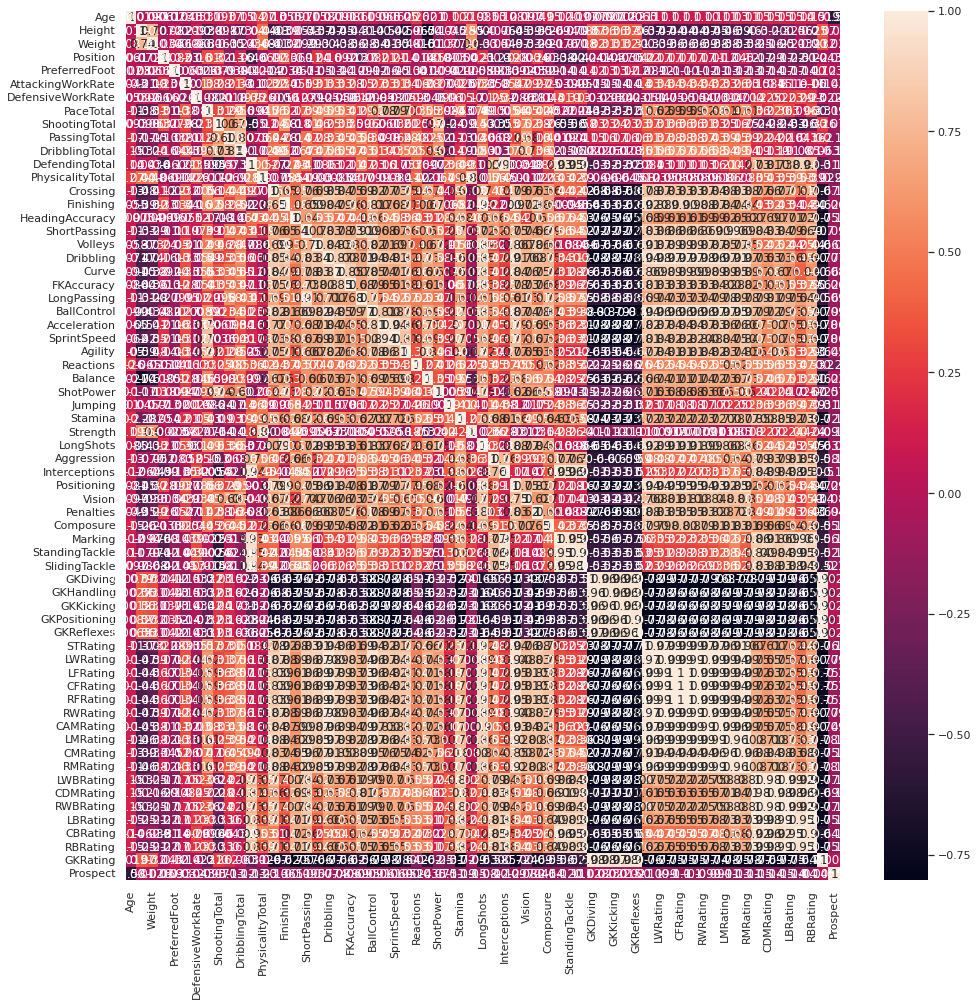

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# heat map으로 상관관계 확인
plt.figure(figsize = (16,16))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [ ]:
# 상관관계 높은 변수들 추출
X_corr = train.corr()['Prospect'].sort_values(ascending = False)
del X_corr['Prospect']
X_corr[:16]

PreferredFoot        0.032732
GKDiving             0.027625
GKHandling           0.022902
GKKicking            0.021931
GKReflexes           0.021446
GKPositioning        0.015245
Height               0.010178
GKRating             0.006496
Weight              -0.025572
AttackingWorkRate   -0.032243
Balance             -0.035366
DefensiveWorkRate   -0.042513
Penalties           -0.045903
Agility             -0.050918
Position            -0.058862
Acceleration        -0.060929
Name: Prospect, dtype: float64

#### 📊 모델링 진행

In [ ]:
# 최적의 파라미터 적용
cb_clf = CatBoostClassifier(random_state=0,learning_rate= 0.02, max_depth= 2)
cb_clf.fit(X_train, y_train)

0:	learn: 0.6859058	total: 7.19ms	remaining: 7.19s
1:	learn: 0.6775169	total: 13.4ms	remaining: 6.7s
2:	learn: 0.6696185	total: 19.5ms	remaining: 6.47s
3:	learn: 0.6620057	total: 23.3ms	remaining: 5.79s
4:	learn: 0.6547440	total: 29.6ms	remaining: 5.89s
5:	learn: 0.6478235	total: 38.1ms	remaining: 6.31s
6:	learn: 0.6411574	total: 43.4ms	remaining: 6.16s
7:	learn: 0.6323341	total: 47ms	remaining: 5.83s
8:	learn: 0.6250597	total: 52.7ms	remaining: 5.8s
9:	learn: 0.6181172	total: 58.5ms	remaining: 5.79s
10:	learn: 0.6114873	total: 64.7ms	remaining: 5.82s
11:	learn: 0.6061471	total: 69.1ms	remaining: 5.69s
12:	learn: 0.6000592	total: 74.8ms	remaining: 5.67s
13:	learn: 0.5957949	total: 80.6ms	remaining: 5.68s
14:	learn: 0.5910635	total: 86.6ms	remaining: 5.69s
15:	learn: 0.5867445	total: 92.6ms	remaining: 5.69s
16:	learn: 0.5822833	total: 98.6ms	remaining: 5.7s
17:	learn: 0.5761003	total: 105ms	remaining: 5.72s
18:	learn: 0.5726029	total: 111ms	remaining: 5.72s
19:	learn: 0.5686840	total: 1

In [ ]:
pool = Pool(
    data=X, 
    label=y
)

In [ ]:
# 위에서 찾은 catboost 최적의 파라미터 적용
cb_r1 = CatBoostRegressor(depth=2, verbose=False, iterations=1).fit(X, y)

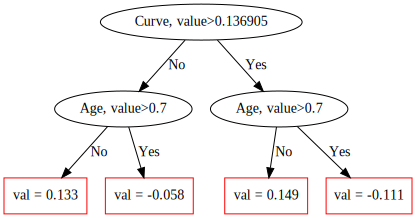

In [ ]:
cb_r1.plot_tree(
    tree_idx=0,
    pool=pool, 
)

📢 결과

----
curve값이 0.136 초과, age값이 0.7 초과 => 유망주 X  
curve값이 0.136 초과, age값이 0.7 이하 => 유망주 O  
curve값이 0.136 이하, age값이 0.7 초과 => 유망주 X  
curve값이 0.136 이하, age값이 0.7 이하 => 유망주 O

#### ✏️ 결론 및 인사이트 도출

In [ ]:
# 중요 변수 보여주는 함수

def show_importance(model, title):
  importances_v = model.feature_importances_
  importances = pd.Series(importances_v, index=X_train.columns)
  del importances['Age']
  imp_top = importances.sort_values(ascending=False)[:16]
  
  plt.figure(figsize=(8,6))
  plt.title('Feature importances Top 16')
  sns.barplot(x = imp_top, y = imp_top.index)
  plt.show()
  
  return(imp_top.index)

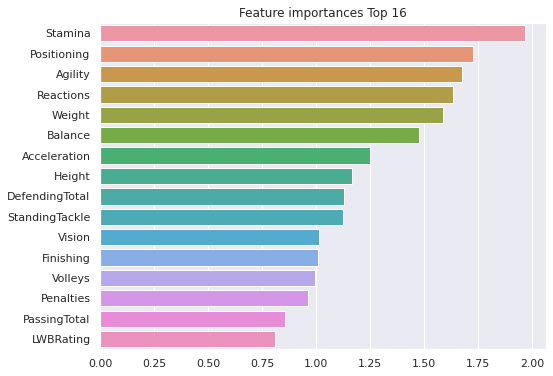

In [ ]:
imp_grid = show_importance(cb_clf,"Catboost")

**📢 중요 변수 설명**  

상위 15개의 중요 변수를 도출한 결과는 다음과 같다.

'Stamina', 'SlidingTackle', 'Positioning', 'Balance', 'Crossing',
       'Strength', 'Jumping', 'Finishing', 'FKAccuracy', 'PassingTotal',
       'Acceleration', 'StandingTackle', 'HeadingAccuracy', 'Agility',
       'RMRating', 'GKDiving'


위 변수들이 선수의 유망도를 판정하는 데에 큰 영향을 미치고 있음을 확인할 수 있다.

---
그러나, feature_importances는 어떤 feature의 값이 랜덤 분포될 경우, 성능이 얼마나 떨어지는지를 보여주기 때문에 종속변수에 미치는 영향력의 방향성을 유추할 수 없다는 단점이 있다.

이를 보완하기 위해 영향에 대한 방향성(positive or negative)을 알려주는 shap value를 추출하여 시각화해보고자 한다.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.8 MB/s 


In [ ]:
import shap

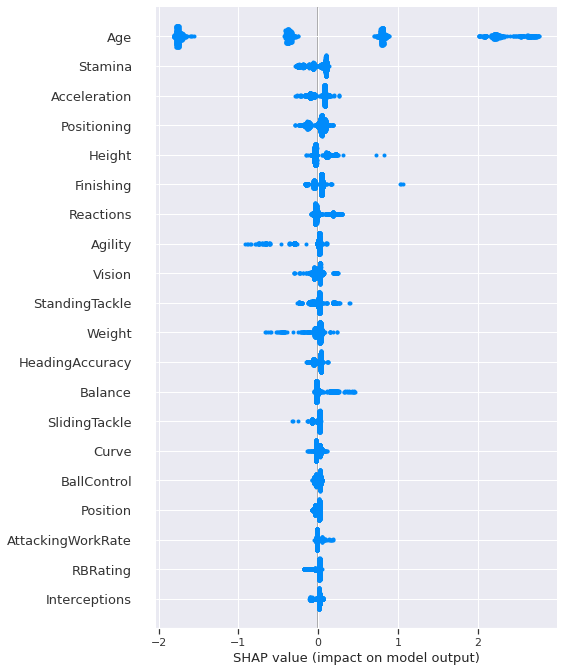

In [ ]:
shap.initjs() #그래프 초기화
explainer = shap.TreeExplainer(cb_clf, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train.columns)

📢 결론

---
Balance, Strength, Jumping 변수가 높을수록 해당 선수가 유망주로 분류될 확률이 높고, 그 외 변수들은 유망주 분류와 음의 상관관계를 갖고 있음을 확인할 수 있다.